In [67]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [56]:
def show(img):
    print(img.shape)
    plt.figure(figsize = (75,75))
    
    if len(img.shape) == 2: # if grayscale, set cmap
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else: # if 3 channels, change from BGR to RGB
        plt.imshow(img[...,::-1])
        
    plt.show()

(885, 703, 3)
3


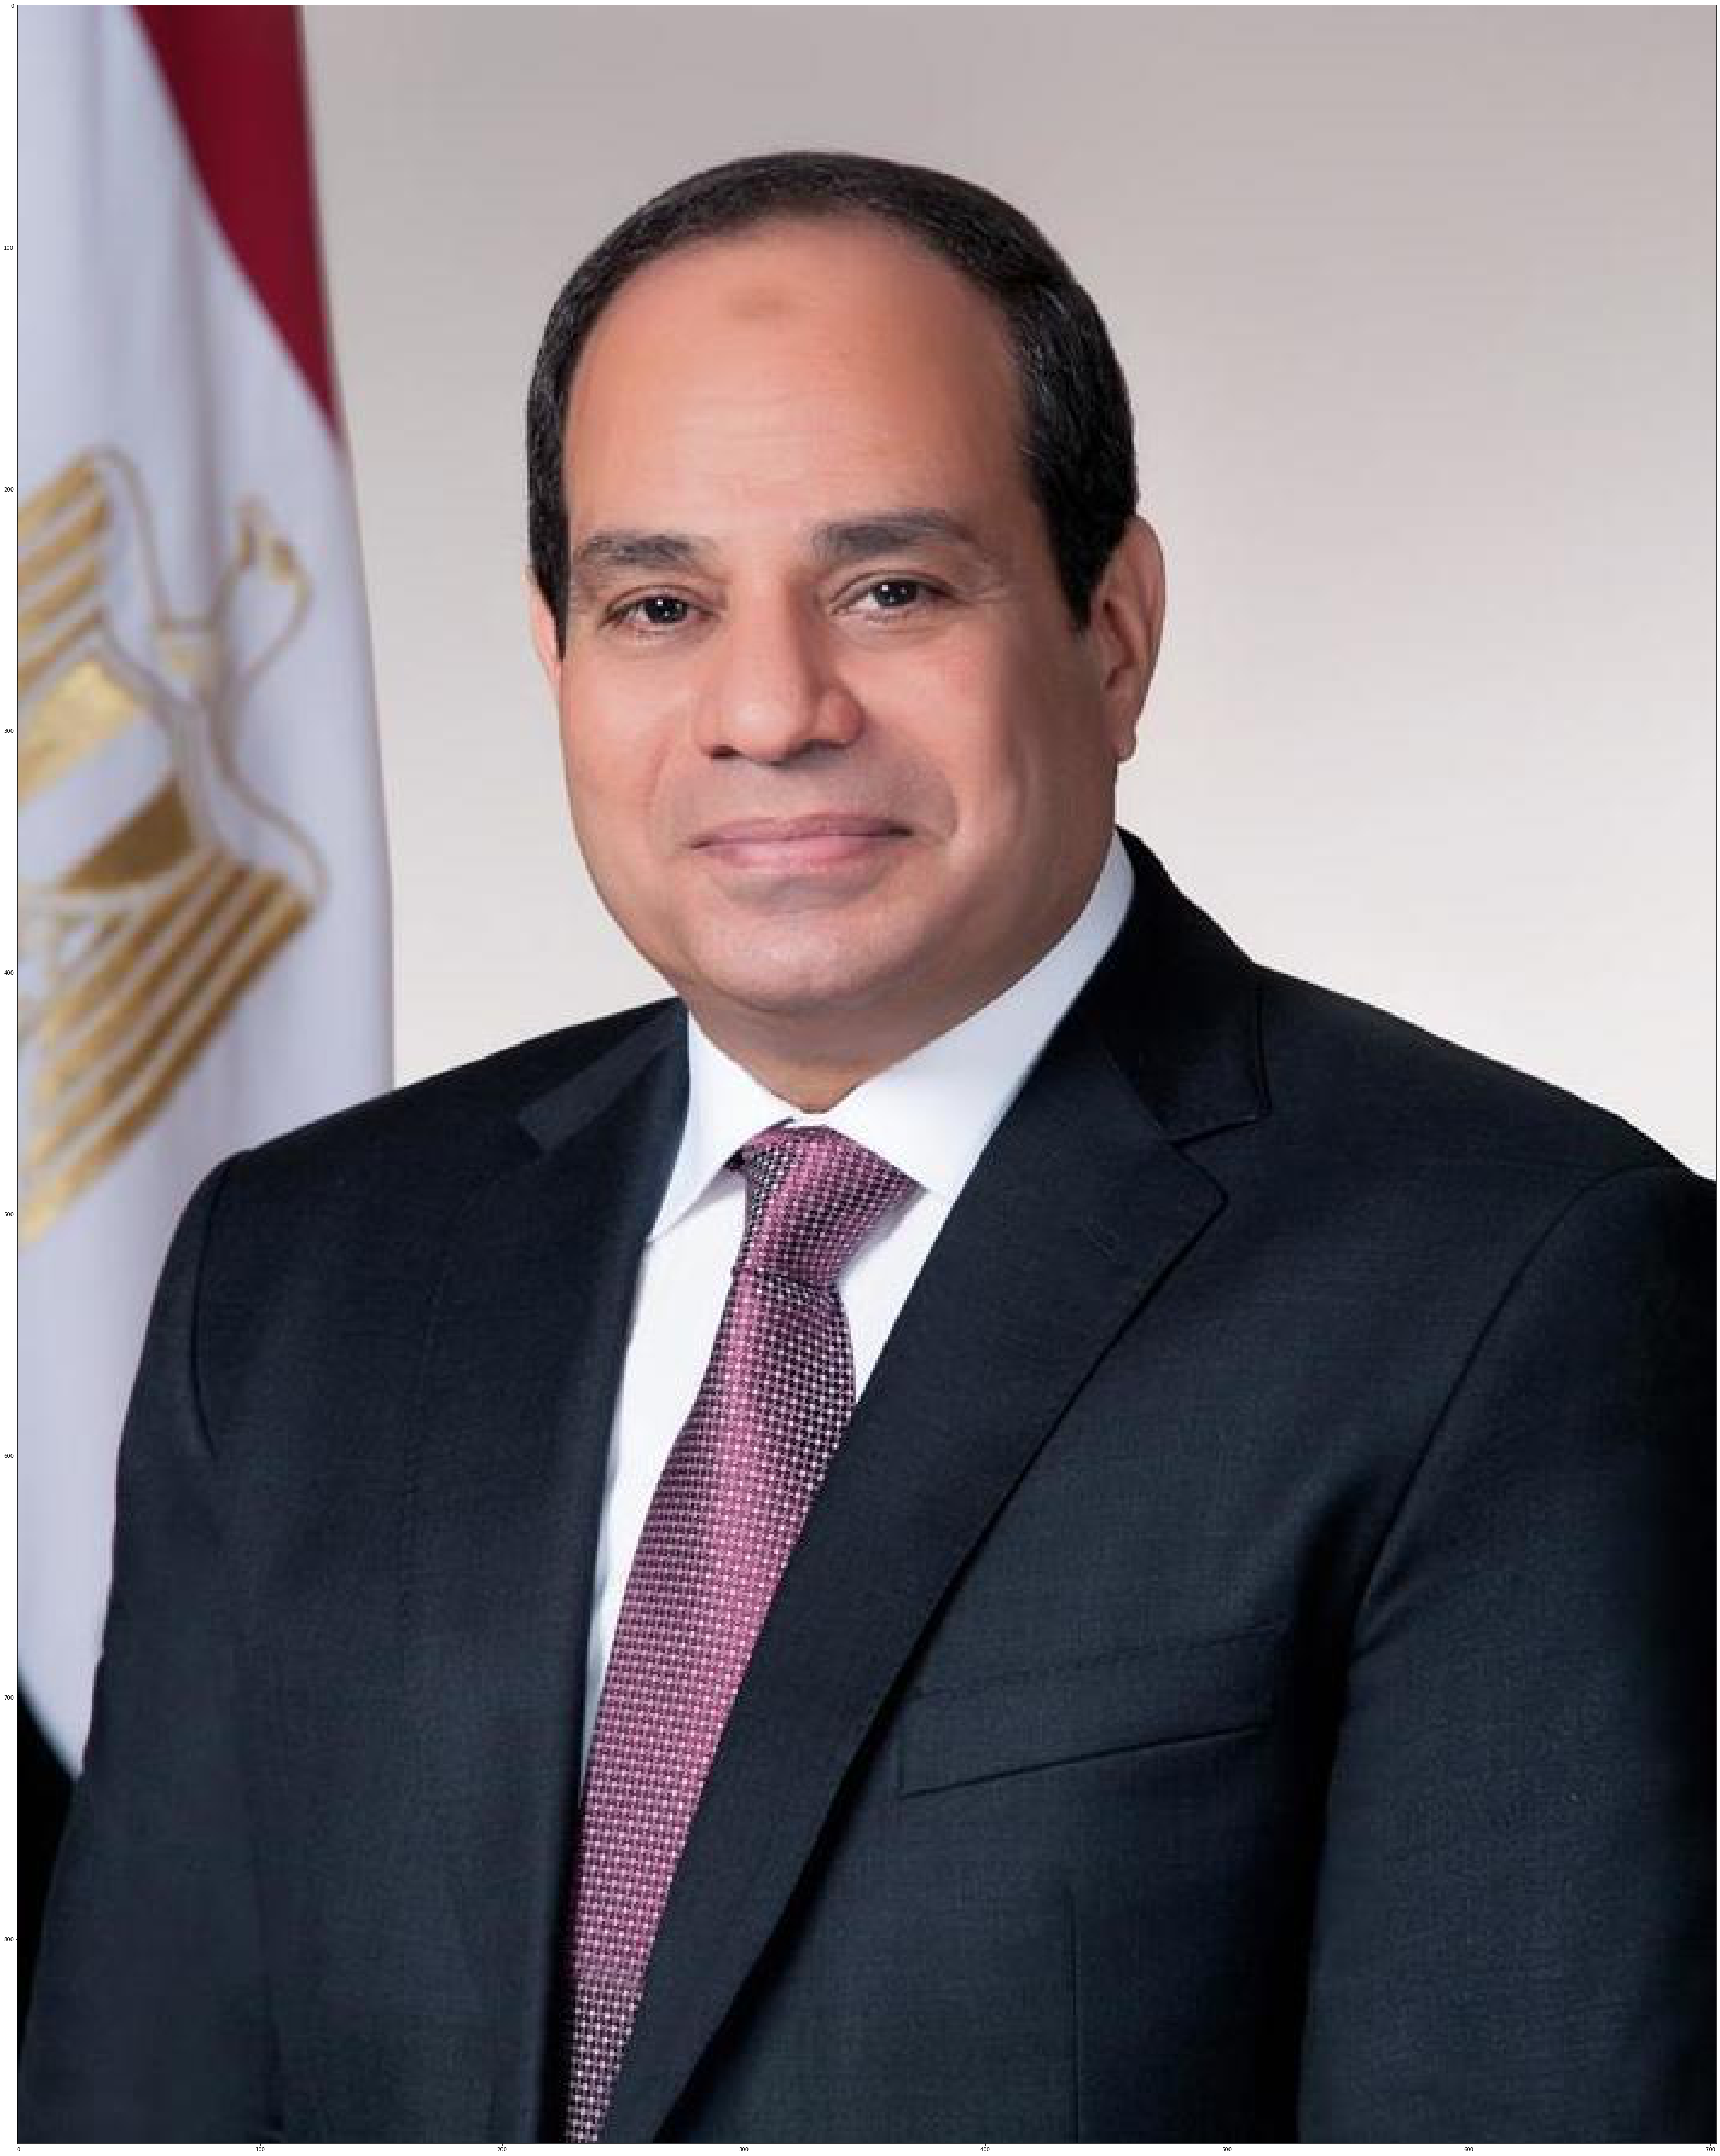

In [57]:
img = cv2.imread("./cartoonify.jpg")
show(img)

# Generating Outline Sketch

### Noise Reduction Using Median Filter

(885, 703)
2


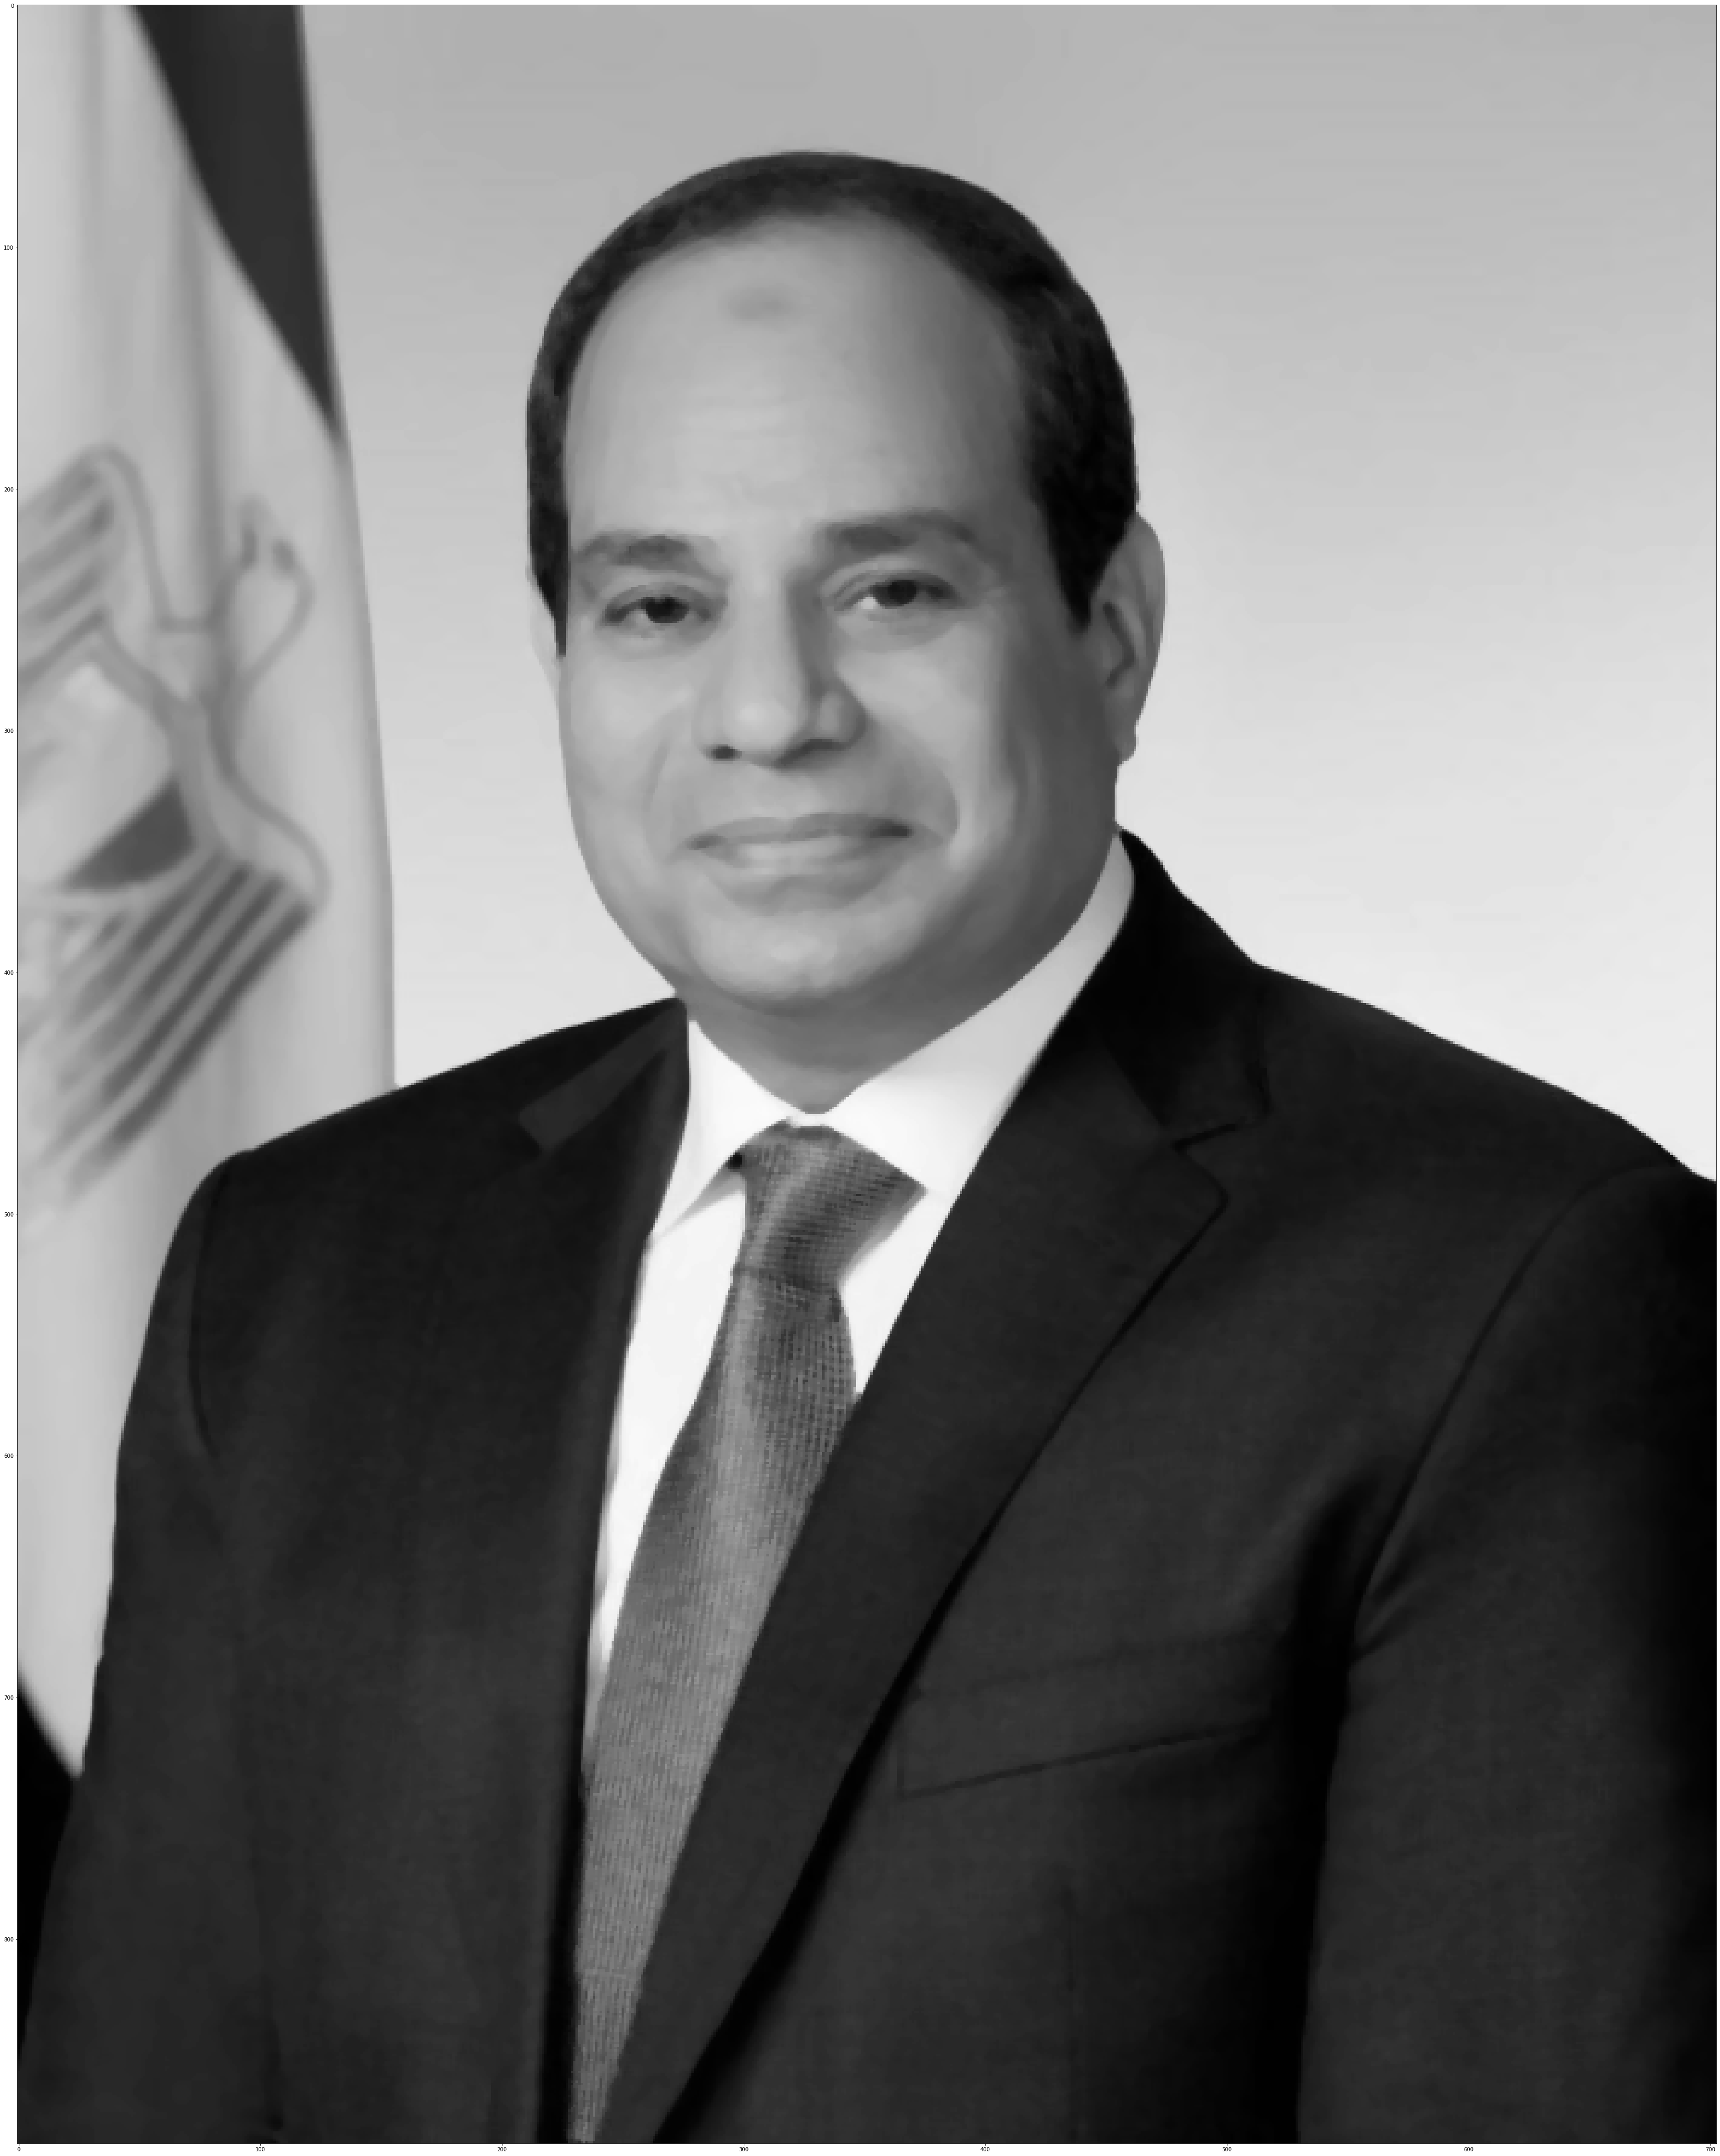

In [58]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_no_noise = cv2.medianBlur(grayscale, 5)
show(img_no_noise)

### Edge Detection Using Laplacian Filter

(885, 703)
2


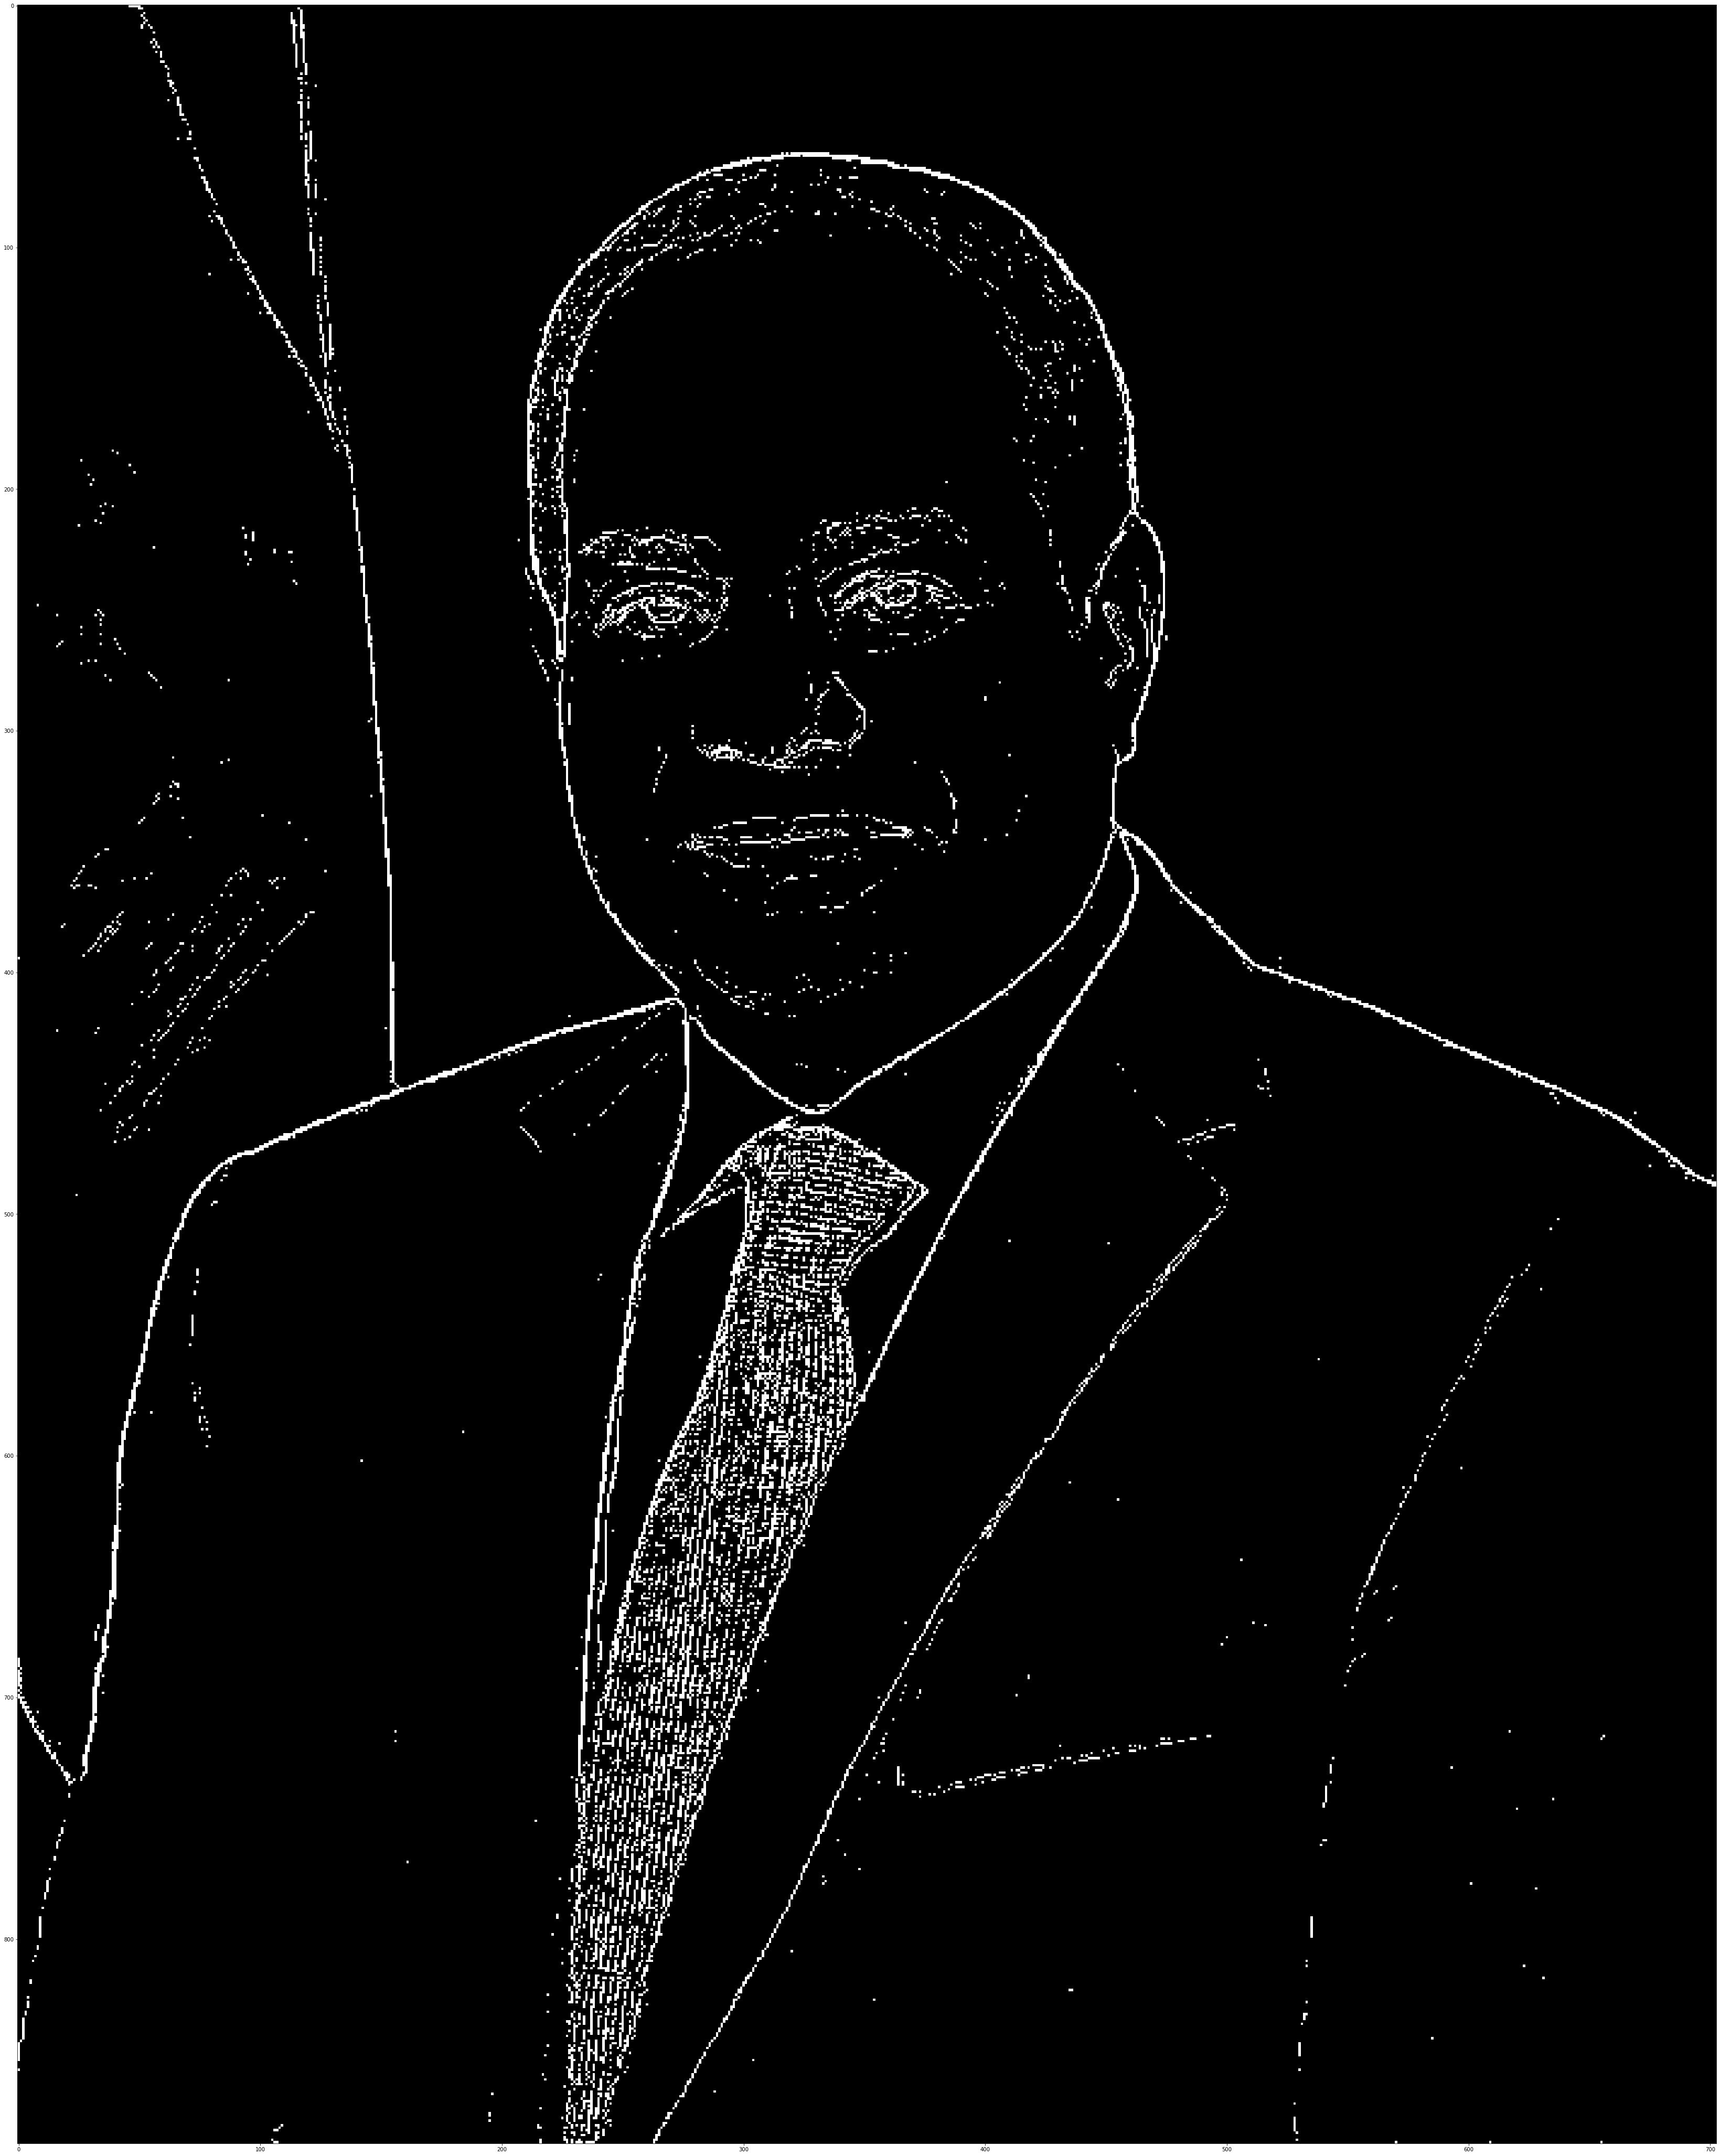

In [104]:
edges = cv2.Laplacian(img_no_noise, cv2.CV_64F)
_,edges = cv2.threshold(edges,8,255,cv2.THRESH_BINARY)
show(edges)

# Generating a Color Painting

(885, 703, 3)
3


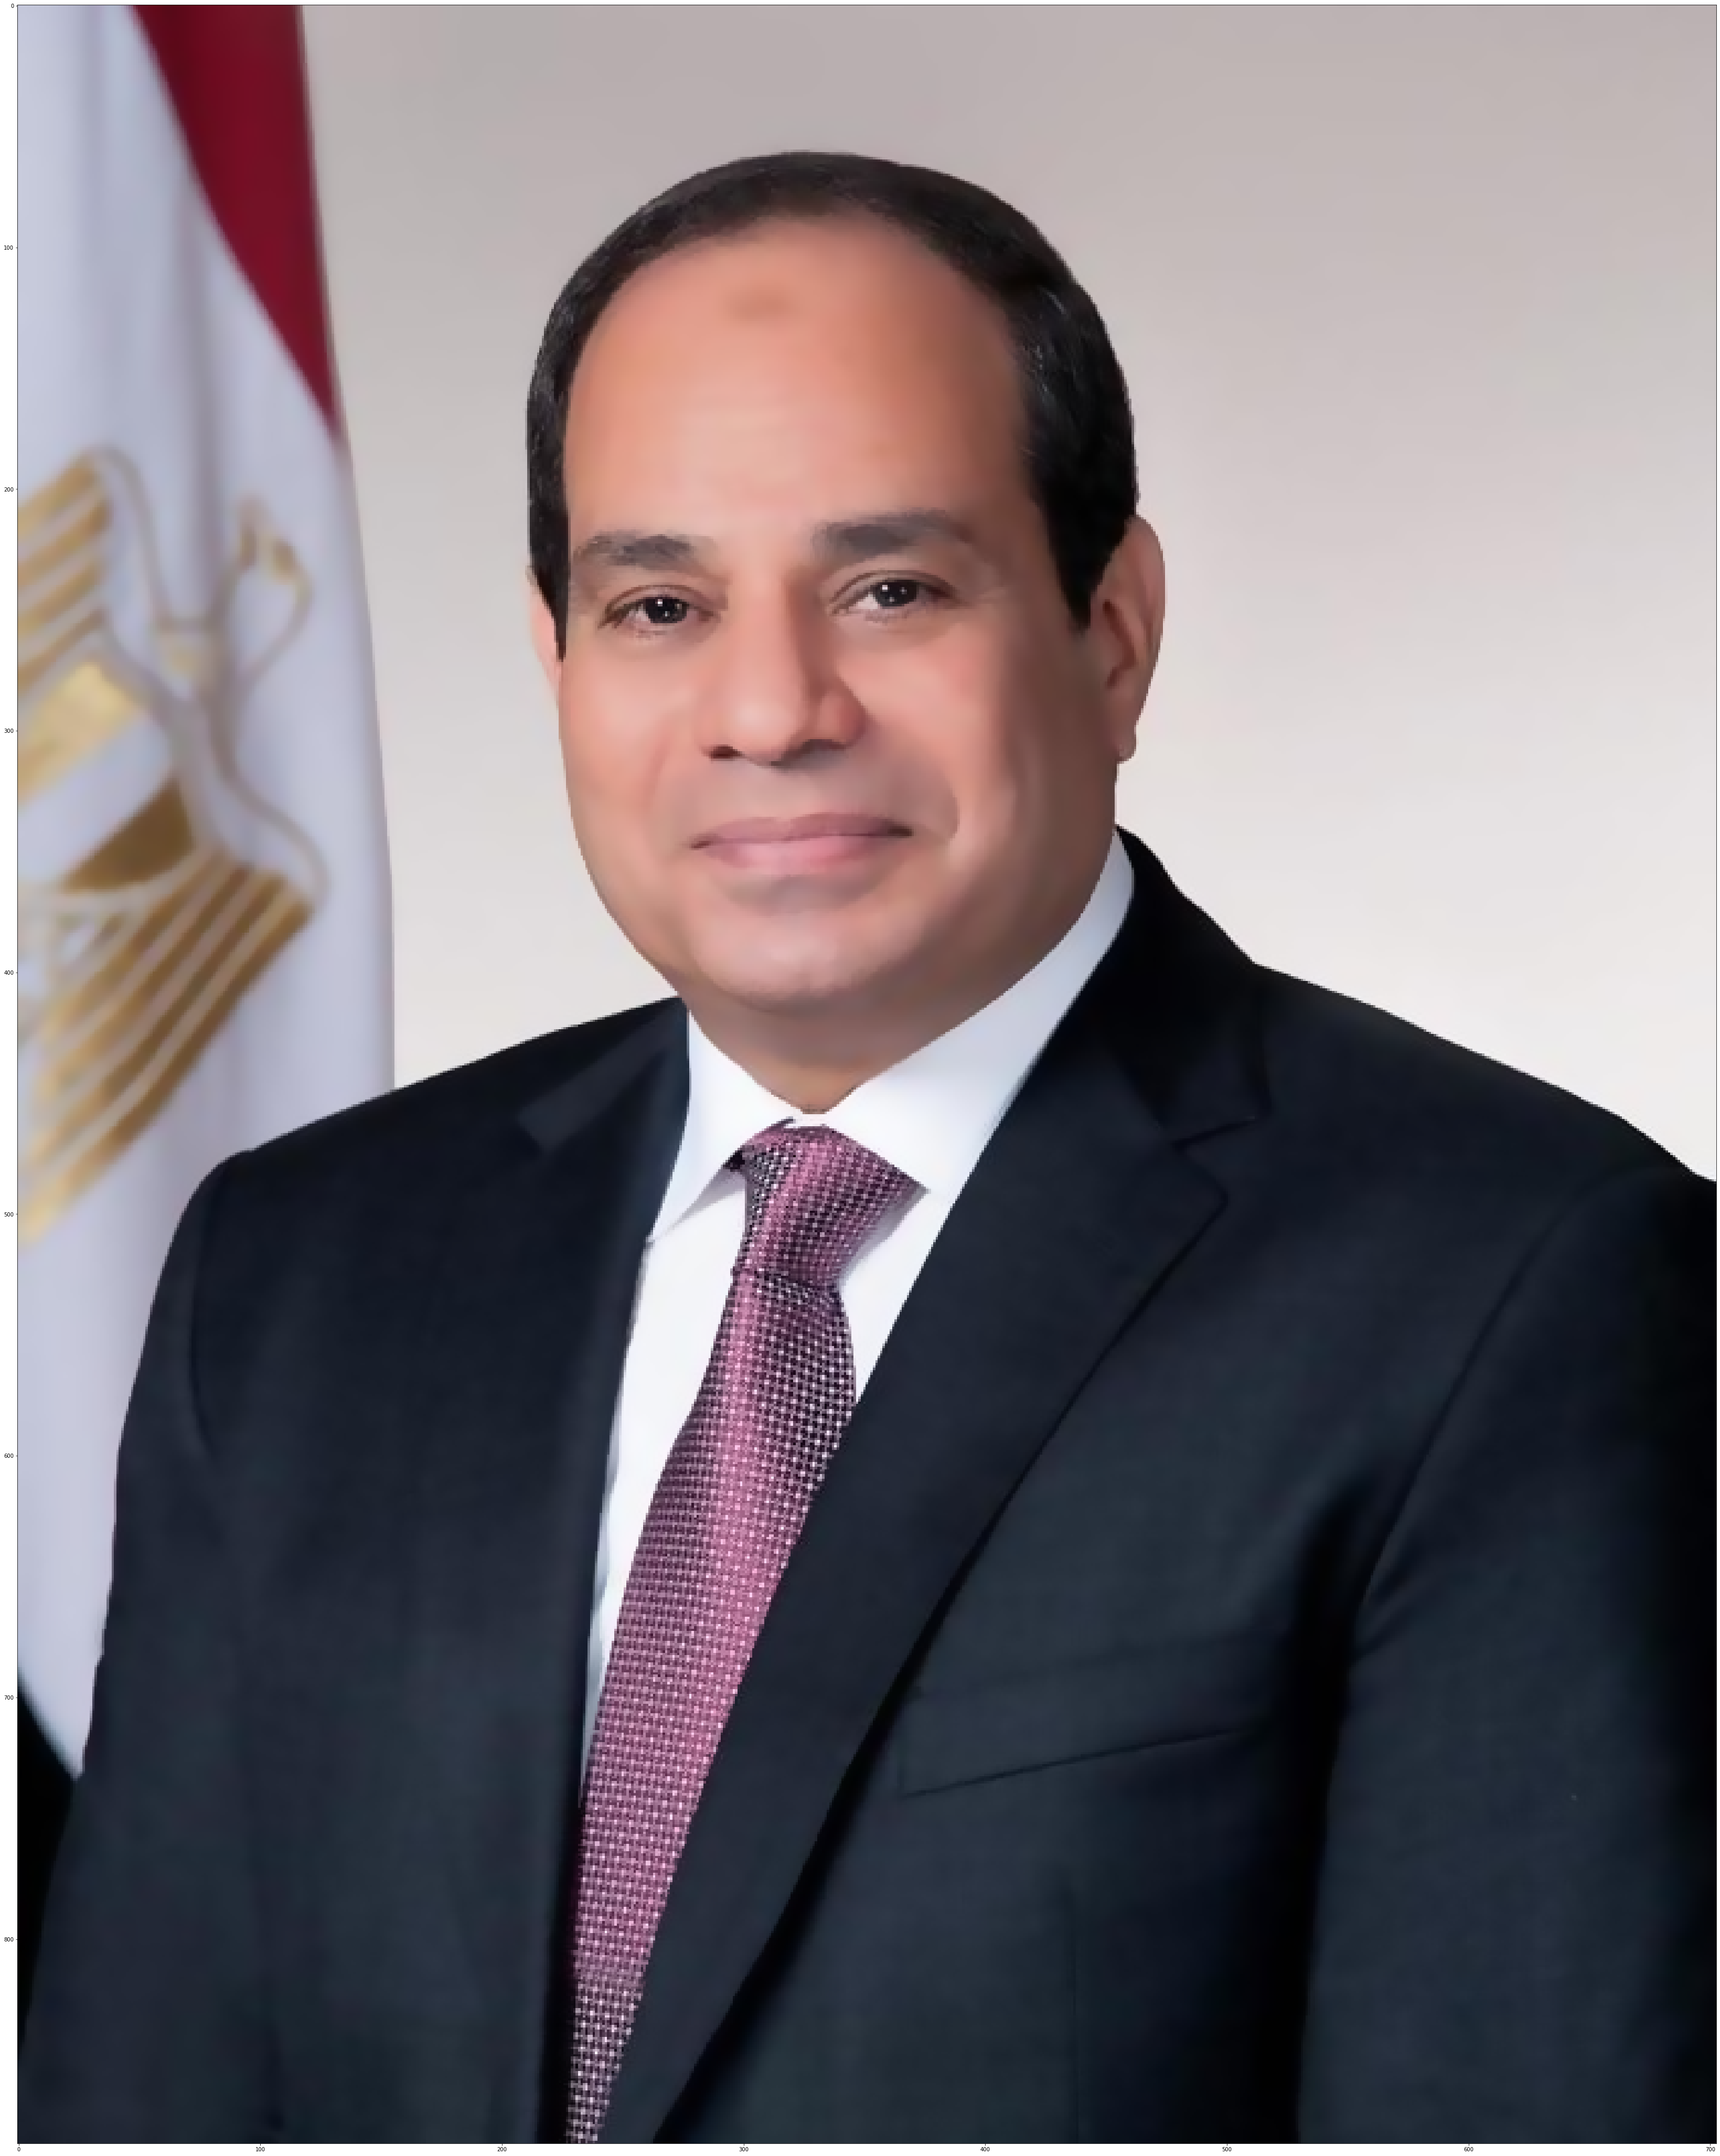

[[[218 199 196]
  [218 199 196]
  [218 199 196]
  ...
  [178 177 187]
  [178 177 187]
  [178 177 187]]

 [[218 199 196]
  [218 199 196]
  [218 199 196]
  ...
  [178 177 187]
  [178 177 187]
  [178 177 187]]

 [[218 199 196]
  [218 199 196]
  [218 199 196]
  ...
  [178 177 187]
  [178 177 187]
  [178 177 187]]

 ...

 [[ 44  32  26]
  [ 43  31  25]
  [ 43  31  25]
  ...
  [ 12   7   4]
  [ 12   7   4]
  [ 12   7   4]]

 [[ 43  31  25]
  [ 43  31  25]
  [ 43  31  25]
  ...
  [ 12   7   4]
  [ 12   7   4]
  [ 12   7   4]]

 [[ 43  31  25]
  [ 43  31  25]
  [ 43  31  25]
  ...
  [ 12   7   4]
  [ 12   7   4]
  [ 12   7   4]]]


In [105]:
color = cv2.bilateralFilter(img,9,45,45)
show(color)

# Overlaying Outling And Color

(885, 703, 3)
3


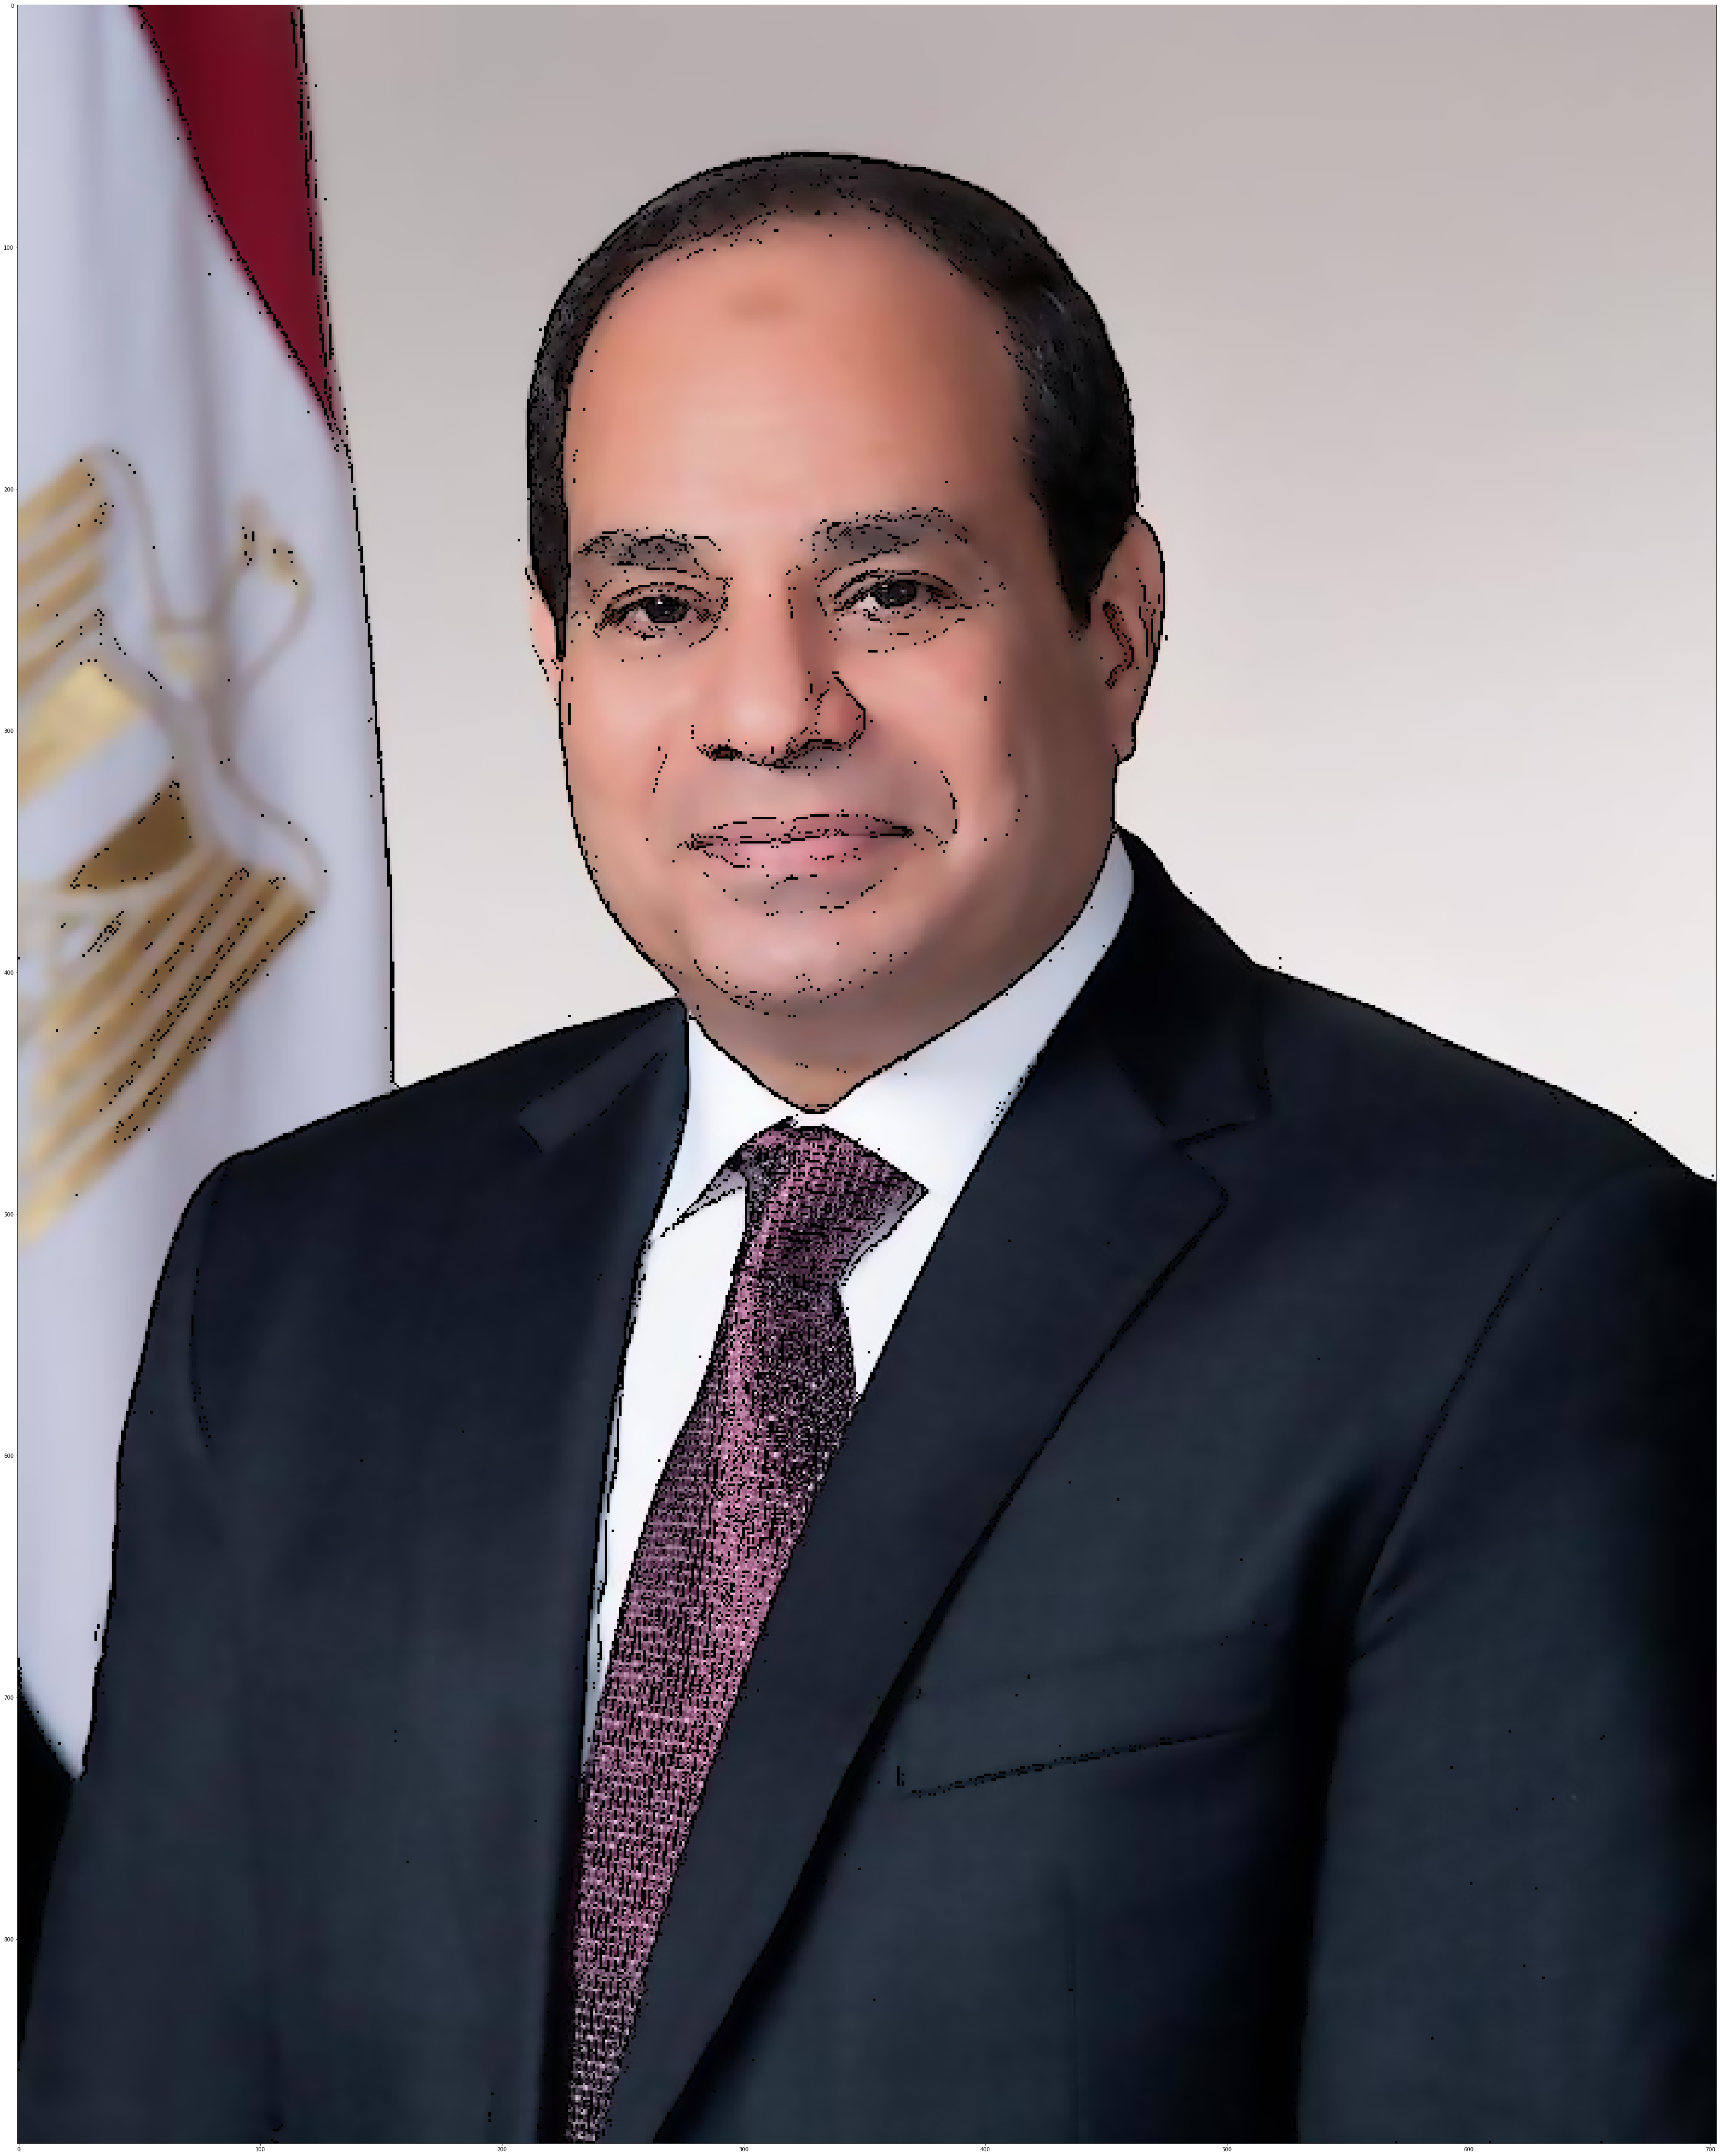

In [106]:
black_bg = np.zeros(img.shape)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            black_bg[i][j][k] = int(color[i][j][k] if edges[i][j] != 255 else 0) / 255
show(black_bg)